In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/My Drive/Capstone_project/innercity.xlsx')

In [4]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [5]:
pd.options.display.max_columns = None

In [6]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,3,8.0,1800.0,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,4,6.0,670.0,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,3,8.0,3040.0,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,3,8.0,1740.0,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,3,7.0,1120.0,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [7]:
## Checking the shape of the data: Number of columns and rows

df.shape

(21613, 23)

In [8]:
df.dtypes

,0
cid,int64
dayhours,object
price,int64
room_bed,float64
room_bath,float64
living_measure,float64
lot_measure,float64
ceil,object
coast,object
sight,float64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

Counts missing values per column.

Filters and shows only the columns with at least 1 missing value.

Sorted in descending order to prioritize which columns need cleaning.

In [10]:
### Examine missing values
df_na = df.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

,0
living_measure15,166
room_bed,108
room_bath,108
sight,57
condition,57
ceil,42
lot_measure,42
total_area,29
lot_measure15,29
furnished,29


Converts dayhours column from object to datetime format for time-based analysis.

Converts columns that should be numeric (but are stored as text) to proper numeric types.

Uses errors='coerce' to safely handle errors and convert invalid values to NaN.


In [11]:
# Convert 'dayhours' to datetime
df['dayhours'] = pd.to_datetime(df['dayhours'], errors='coerce')

# Convert numeric-looking columns from object to numeric
numeric_cols = ['ceil', 'condition', 'yr_built', 'long', 'total_area']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check the updated data types and missing values again
df.dtypes[['dayhours', 'ceil', 'condition', 'yr_built', 'long', 'total_area']]


,0
dayhours,datetime64[ns]
ceil,float64
condition,float64
yr_built,float64
long,float64
total_area,float64


The presence of a non-numeric value like '$' causes problems for numeric analysis or machine learning.

So, this line ensures the column is converted to only numeric values.

pd.to_numeric(...): converts strings or mixed types into numeric (int/float).

errors='coerce': if a value can’t be converted (like '$', 'abc'), it becomes NaN (missing value).


This step cleans the data and prepares it for:

Statistical analysis

Machine learning

Correlation studies

In [12]:
df['coast'] = pd.to_numeric(df['coast'], errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cid               21613 non-null  int64         
 1   dayhours          21613 non-null  datetime64[ns]
 2   price             21613 non-null  int64         
 3   room_bed          21505 non-null  float64       
 4   room_bath         21505 non-null  float64       
 5   living_measure    21596 non-null  float64       
 6   lot_measure       21571 non-null  float64       
 7   ceil              21541 non-null  float64       
 8   coast             21582 non-null  float64       
 9   sight             21556 non-null  float64       
 10  condition         21528 non-null  float64       
 11  quality           21612 non-null  float64       
 12  ceil_measure      21612 non-null  float64       
 13  basement          21612 non-null  float64       
 14  yr_built          2159

In [14]:
print(df['coast'].unique())

[ 0.  1. nan]


select_dtypes(...) selects all columns that are numeric (int64 or float64).

For each numeric column, it fills any missing values (NaN) with the median of that column.




Selects all object-type (i.e., categorical or string) columns.

For each column, it fills missing values with the most frequent value (mode).





In [15]:
# Fill numeric columns with median
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill remaining object columns (if any) with mode
object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [16]:
### Examine missing values
df_na = df.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

,0


In [17]:
### Let's examine the target column which is price

df.describe(include="all")["price"]

,price
count,2.161300e+04
mean,5.401822e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06
std,3.673622e+05


In [18]:
df.price.unique()

array([600000, 190000, 735000, ..., 725126, 332100, 685530])

In [19]:
print(df.describe())

                cid                       dayhours         price  \
count  2.161300e+04                          21613  2.161300e+04   
mean   4.580302e+09  2014-10-29 04:38:01.959931392  5.401822e+05   
min    1.000102e+06            2014-05-02 00:00:00  7.500000e+04   
25%    2.123049e+09            2014-07-22 00:00:00  3.219500e+05   
50%    3.904930e+09            2014-10-16 00:00:00  4.500000e+05   
75%    7.308900e+09            2015-02-17 00:00:00  6.450000e+05   
max    9.900000e+09            2015-05-27 00:00:00  7.700000e+06   
std    2.876566e+09                            NaN  3.673622e+05   

           room_bed     room_bath  living_measure   lot_measure          ceil  \
count  21613.000000  21613.000000    21613.000000  2.161300e+04  21613.000000   
mean       3.369500      2.115845     2079.727155  1.509003e+04      1.494147   
min        0.000000      0.000000      290.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000     1430.000000  5.043000e+03

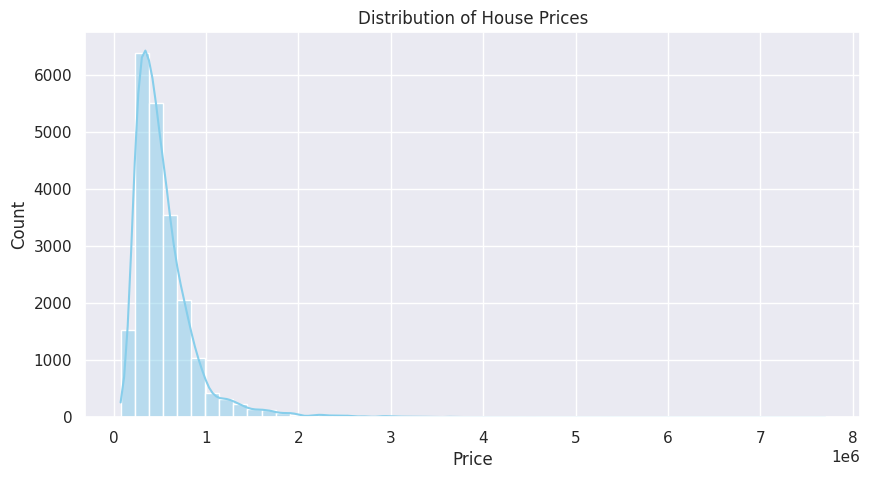

In [20]:
# Basic histogram with KDE (curve)
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)
plt.show()

For each column:

Creates a histogram showing the count of values.

Overlays a KDE curve to show the probability density (smooth curve).

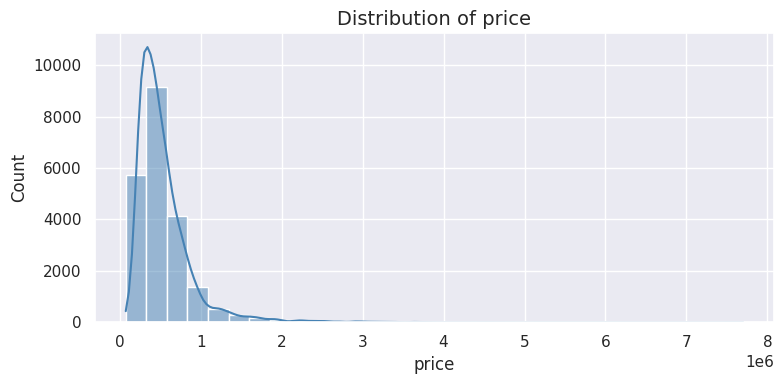

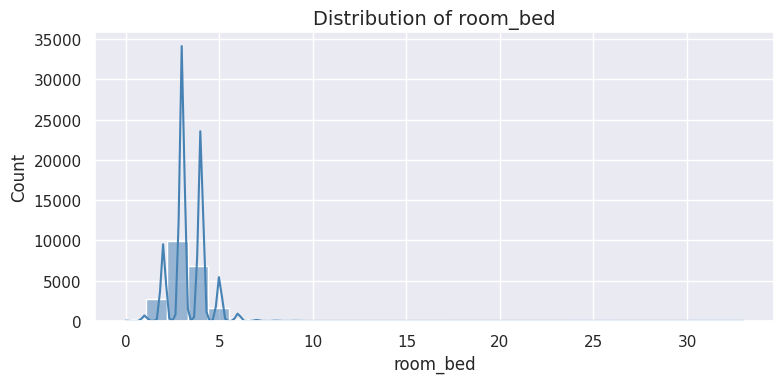

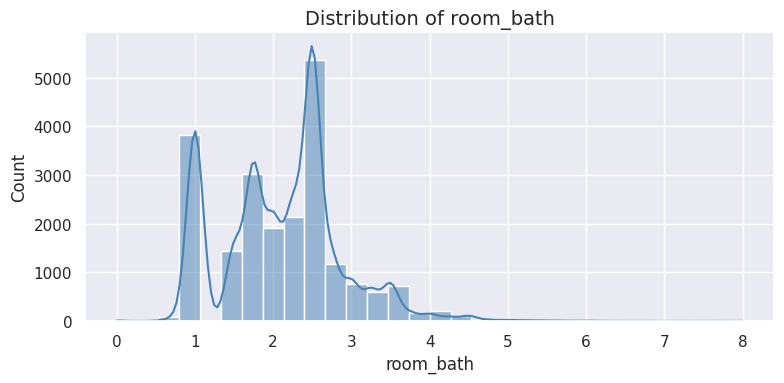

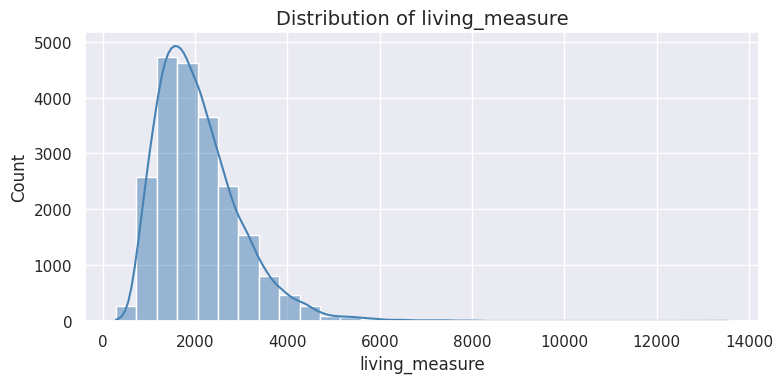

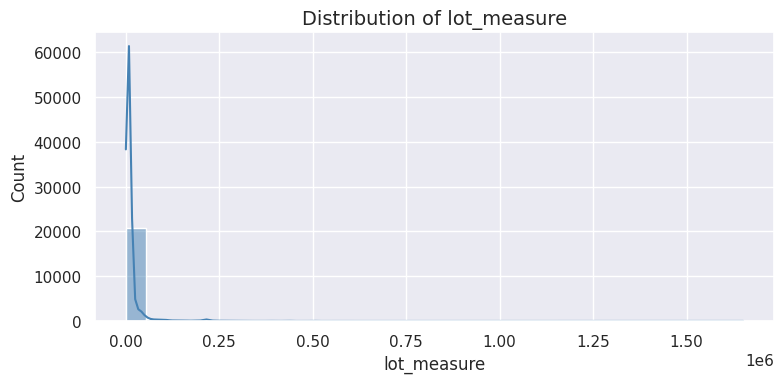

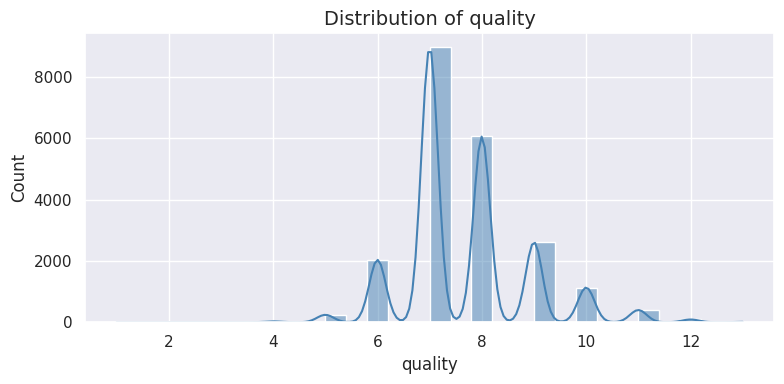

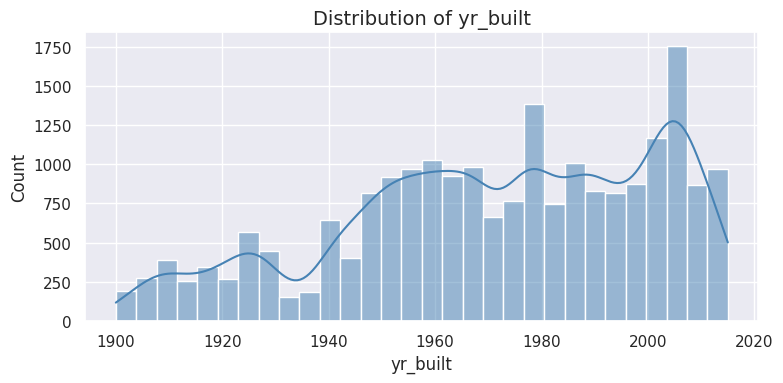

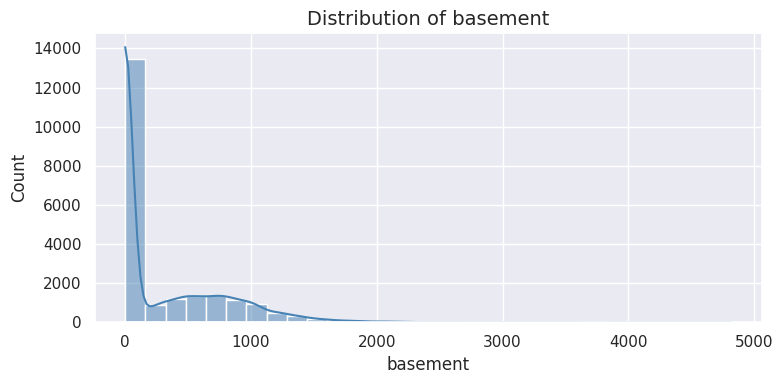

In [21]:
#' List of key numerical features
num_features = ['price', 'room_bed', 'room_bath', 'living_measure',
                'lot_measure', 'quality', 'yr_built', 'basement']

# Create histogram + KDE for each feature
for col in num_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


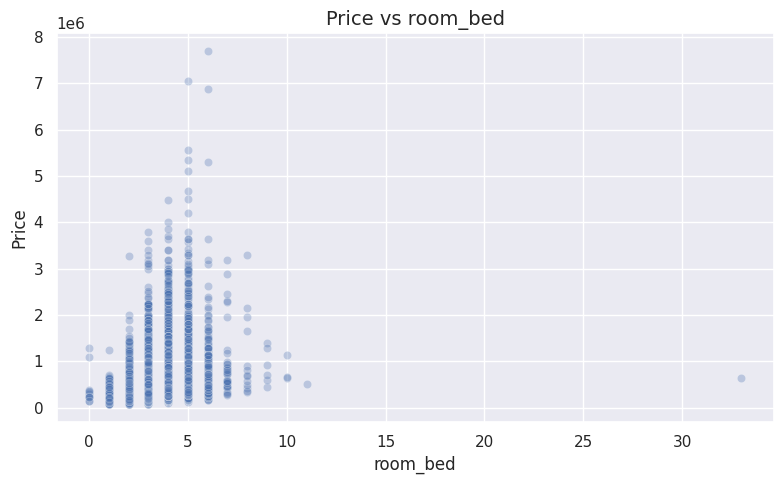

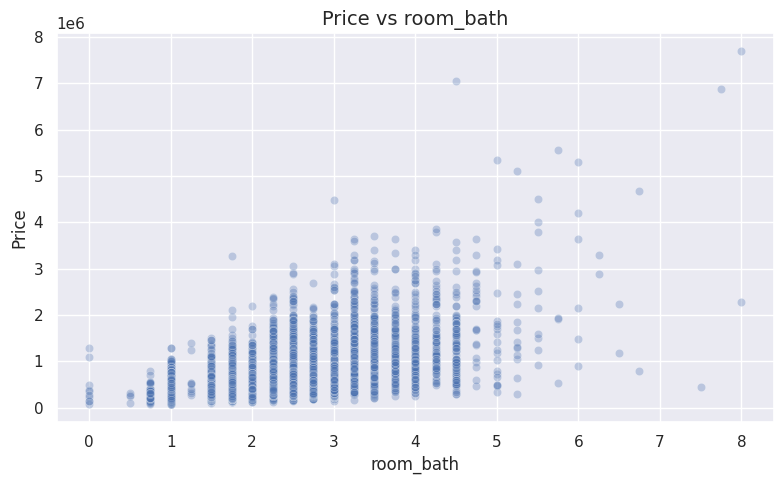

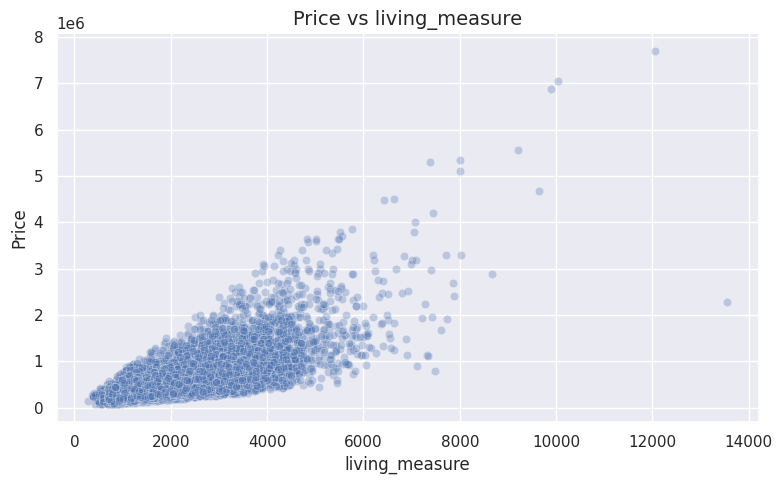

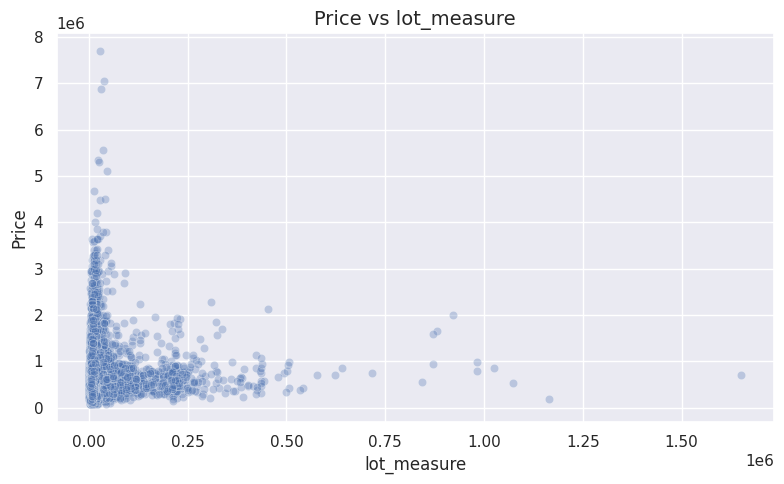

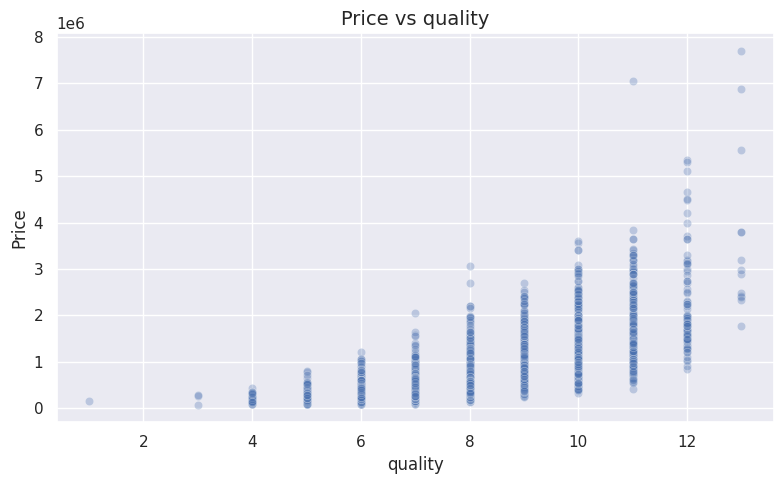

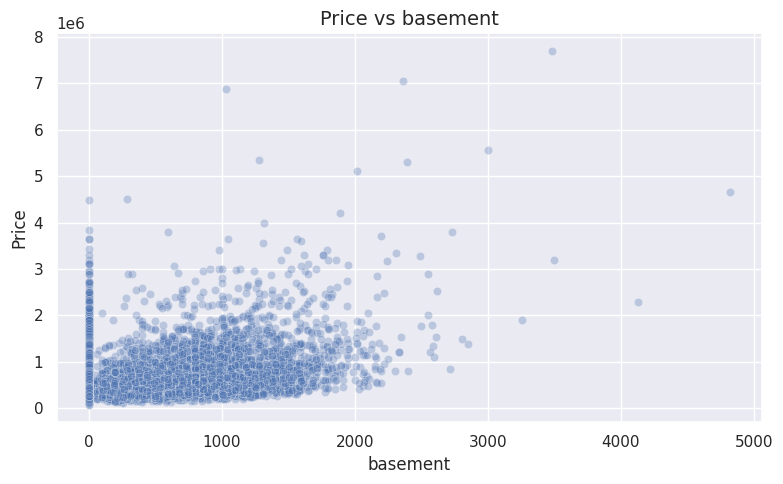

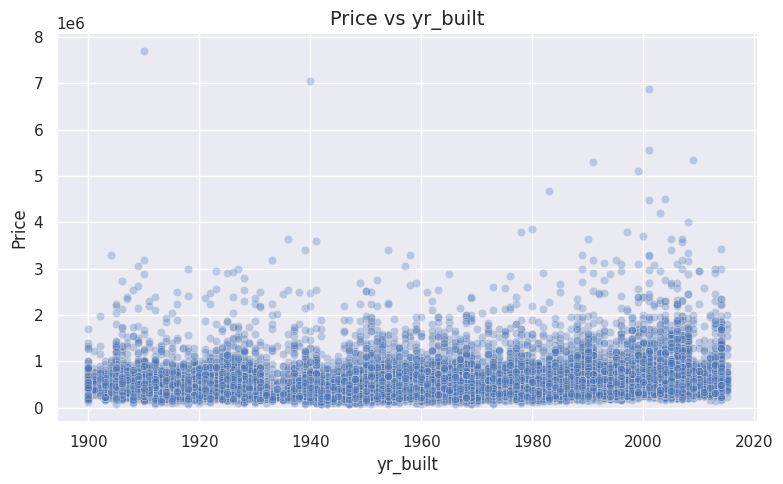

In [22]:

# List of numeric features to compare with price
num_features = ['room_bed', 'room_bath', 'living_measure', 'lot_measure', 'quality', 'basement', 'yr_built']

# Plot scatter plots
for col in num_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=col, y='price', alpha=0.3)
    plt.title(f'Price vs {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


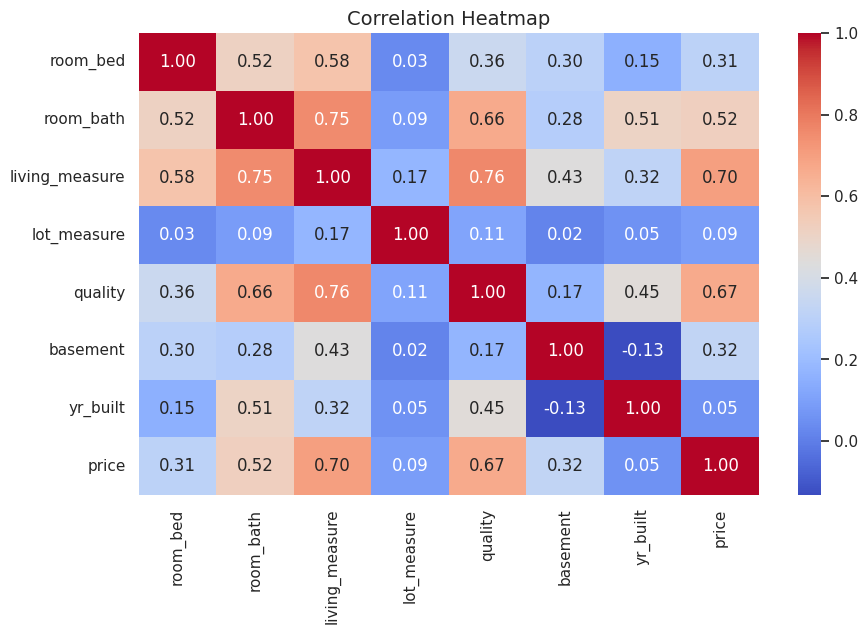

In [23]:
# Only for numeric columns
correlation_matrix = df[num_features + ['price']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


It's just a unique ID (not useful for modeling).
lot_measure → Very low correlation with price (0.09)

yr_built → Almost no linear correlation (0.05)
dayhours may not add value in current form (unless engineered as a "seasonality" variable)

If it's just the sale timestamp,  might drop it


In [24]:
cols_to_drop = ['cid', 'lot_measure', 'yr_built', 'dayhours']  # Add more if needed
df.drop(cols_to_drop, axis=1, inplace=True)


Missing value treatement

In [25]:
# Total missing values per column
df.isnull().sum()


,0
price,0
room_bed,0
room_bath,0
living_measure,0
ceil,0
coast,0
sight,0
condition,0
quality,0
ceil_measure,0


Outlier Treatment of Price

In [26]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the values
df['price'] = df['price'].clip(lower=lower_bound, upper=upper_bound)


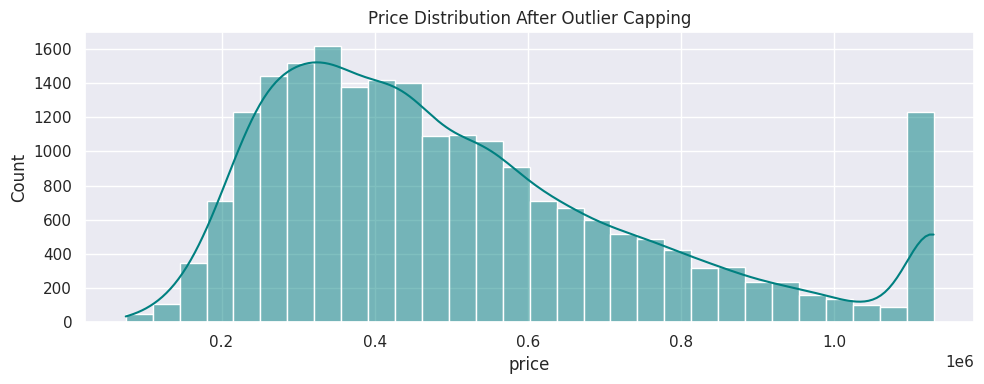

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.histplot(df['price'], bins=30, kde=True, color='teal')
plt.title('Price Distribution After Outlier Capping')
plt.xlabel('price')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
print(df['room_bed'].value_counts().sort_index())


room_bed
0.0       13
1.0      197
2.0     2747
3.0     9875
4.0     6854
5.0     1595
6.0      270
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: count, dtype: int64


Outlier treatment of Number of rooms

In [29]:
df['room_bed'] = df['room_bed'].apply(lambda x: 10 if x > 10 else x)


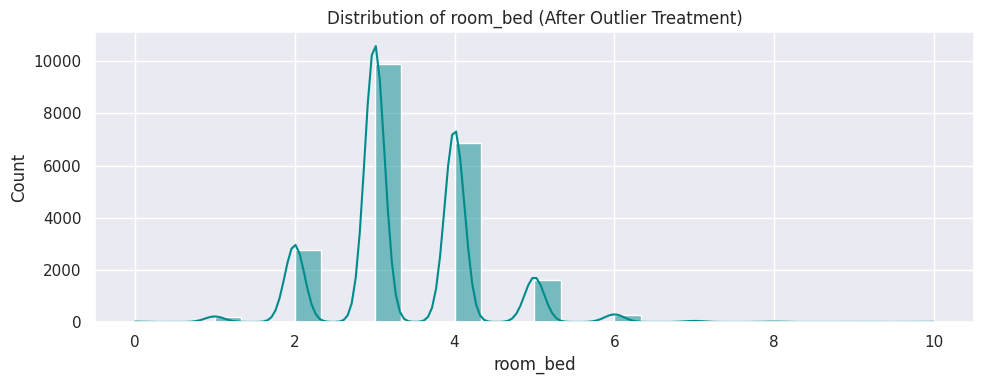

In [30]:
plt.figure(figsize=(10, 4))
sns.histplot(df['room_bed'], kde=True, bins=30, color='darkcyan')
plt.title('Distribution of room_bed (After Outlier Treatment)')
plt.xlabel('room_bed')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


Outlier treatment of number of bathrooms

In [31]:
print(df['room_bath'].value_counts().sort_index())


room_bath
0.00      10
0.50       4
0.75      72
1.00    3829
1.25       9
1.50    1439
1.75    3031
2.00    1917
2.25    2147
2.50    5358
2.75    1178
3.00     750
3.25     588
3.50     726
3.75     155
4.00     135
4.25      78
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: count, dtype: int64


In [32]:
df['room_bath'] = df['room_bath'].apply(lambda x: 5 if x > 5 else x)


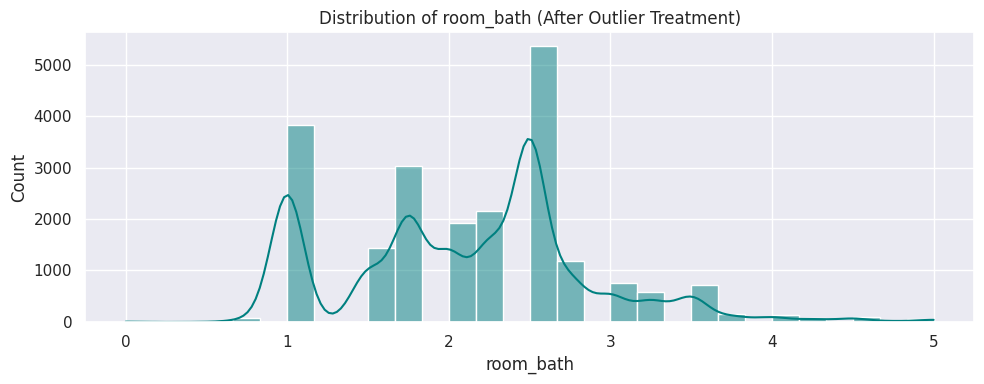

In [33]:
plt.figure(figsize=(10, 4))
sns.histplot(df['room_bath'], kde=True, bins=30, color='teal')
plt.title('Distribution of room_bath (After Outlier Treatment)')
plt.xlabel('room_bath')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


The distribution of living_measure shows a right-skewed pattern with a long tail extending beyond 10,000 square feet, which clearly suggests outliers (i.e., very large luxury houses that are not typical).

In [34]:
Q1 = df['living_measure'].quantile(0.25)
Q3 = df['living_measure'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR

# Capping the outliers
df['living_measure'] = df['living_measure'].apply(lambda x: upper_bound if x > upper_bound else x)


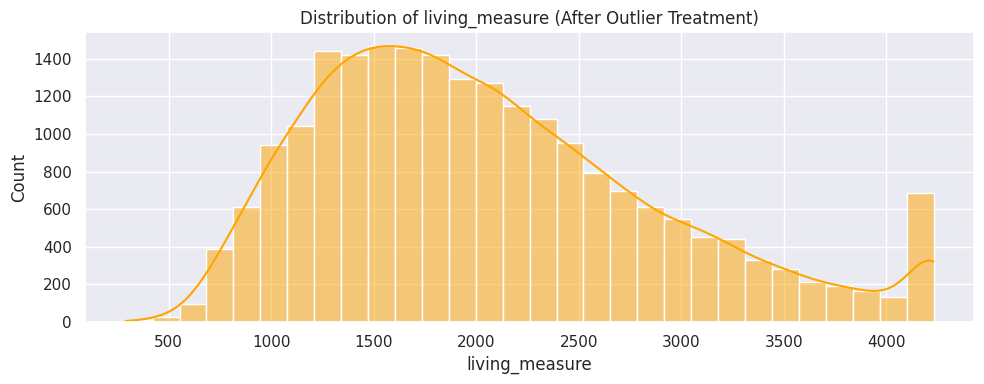

In [35]:
plt.figure(figsize=(10, 4))
sns.histplot(df['living_measure'], kde=True, bins=30, color='orange')
plt.title('Distribution of living_measure (After Outlier Treatment)')
plt.xlabel('living_measure')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


The plot of the basement variable shows a strong right skew with clear outliers—most values are concentrated on the left, and a few values stretch far to the right (up to 5000+), which can distort model performance.

In [36]:
# Calculate IQR for basement
Q1 = df['basement'].quantile(0.25)
Q3 = df['basement'].quantile(0.75)
IQR = Q3 - Q1

# Set upper bound
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['basement'] = df['basement'].apply(lambda x: upper_bound if x > upper_bound else x)


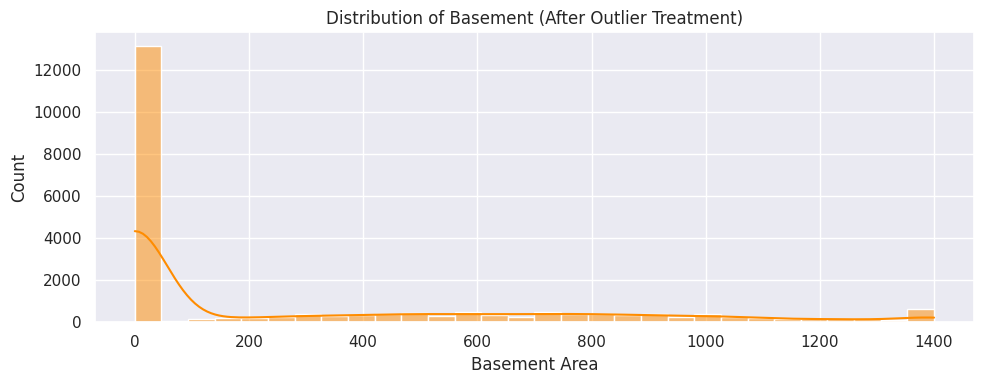

In [37]:
plt.figure(figsize=(10, 4))
sns.histplot(df['basement'], kde=True, bins=30, color='darkorange')
plt.title('Distribution of Basement (After Outlier Treatment)')
plt.xlabel('Basement Area')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Convert object-type numeric columns
object_cols_to_convert = ['ceil', 'condition',  'long', 'total_area', 'coast']
for col in object_cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing values
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop non-informative columns
#df.drop(columns=['cid', 'dayhours'], inplace=True)
# Drop columns only if they exist
cols_to_drop = ['cid', 'dayhours']
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

# Define features and target
X = df.drop(columns=['price'])
y = df['price']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}")
    print(f"  R2 Score : {r2_score(y_test, y_pred):.4f}")
    print(f"  MAE      : {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"  RMSE     : {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}\n")


Linear Regression
  R2 Score : 0.7430
  MAE      : 95595.60
  RMSE     : 125194.54

Decision Tree
  R2 Score : 0.7849
  MAE      : 77363.90
  RMSE     : 114531.35

Random Forest
  R2 Score : 0.8963
  MAE      : 54480.65
  RMSE     : 79533.25

Gradient Boosting
  R2 Score : 0.8781
  MAE      : 61150.20
  RMSE     : 86218.59

XGBoost
  R2 Score : 0.9026
  MAE      : 53967.57
  RMSE     : 77070.93



In [39]:
# Features and target
X = df.drop(columns='price')
y = df['price']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# MAPE function
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Models to test
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0)
}

# Evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAPE (%)": mean_absolute_percentage_error(y_test, y_pred)
    }

# Convert to DataFrame
results_df = pd.DataFrame(results).T.round(2).sort_values(by="R2 Score", ascending=False)
print(results_df)

                   R2 Score       MAE       RMSE  MAPE (%)
Random Forest          0.90  54480.65   79533.25     12.09
XGBoost                0.90  53967.57   77070.93     11.97
Gradient Boosting      0.88  61150.20   86218.59     13.45
Decision Tree          0.78  77363.90  114531.35     17.07
Linear Regression      0.74  95595.60  125194.54     21.26


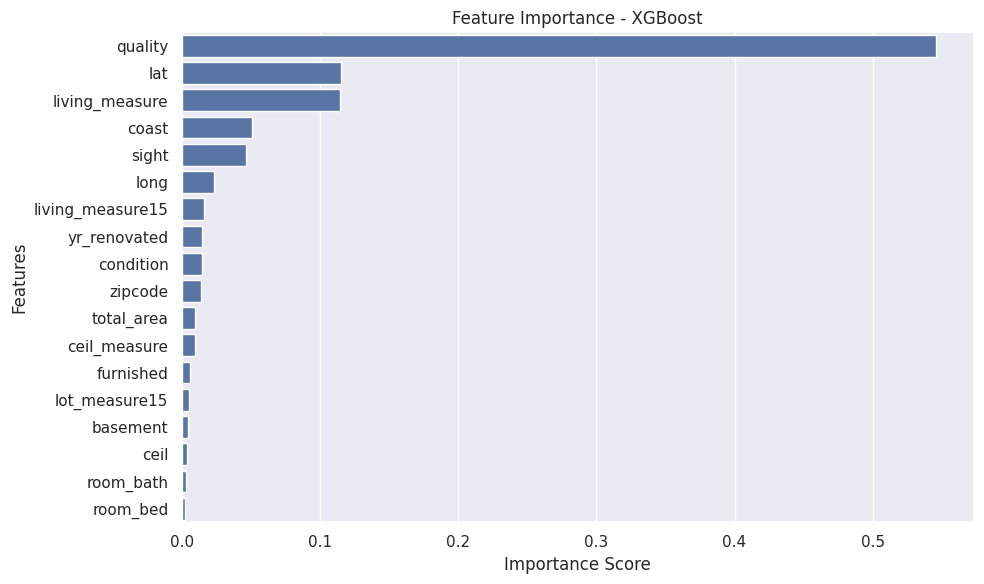

In [86]:
# Plot Feature Importance for the Best Model (e.g., XGBoost)
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure you use the same X used before scaling
features = X.columns
importances = models["XGBoost"].feature_importances_  # Can replace with "Random Forest" or "Gradient Boosting"

feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


Ensemble

In [40]:
from sklearn.ensemble import StackingRegressor

# Define base regressors
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gbr', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42, verbosity=0))
]

# Meta-model
meta_model = LinearRegression()

# Stacking Regressor
stack_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)
stack_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_stack = stack_model.predict(X_test)

# Performance Metrics
r2_stack = r2_score(y_test, y_pred_stack)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
mape_stack = np.mean(np.abs((y_test - y_pred_stack) / y_test)) * 100

print("Stacked Ensemble Performance:")
print(f"R² Score: {r2_stack:.2f}")
print(f"MAE: {mae_stack:.2f}")
print(f"RMSE: {rmse_stack:.2f}")
print(f"MAPE: {mape_stack:.2f}%")

Stacked Ensemble Performance:
R² Score: 0.91
MAE: 52166.37
RMSE: 75318.78
MAPE: 11.57%


hyper parameter tuning XGBoost

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(xgb, param_grid, cv=5, scoring='r2', n_iter=10, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


Best parameters: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best score: 0.9046180367469787


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=42)

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    n_iter=10,            # Reduced from 25
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

rf_random.fit(X_train, y_train)
best_rf_model = rf_random.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Evaluate the Tuned Model

In [51]:
# Predict on test data
rf_preds = best_rf_model.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred):
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred)
    mape = (abs((y_true - y_pred) / y_true).mean()) * 100
    return r2, mae, rmse, mape

# Evaluate
rf_scores = evaluate_model(y_test, rf_preds)
print("Random Forest Tuned Scores:")
print(f"R² Score : {rf_scores[0]:.4f}")
print(f"MAE      : {rf_scores[1]:.2f}")
print(f"RMSE     : {rf_scores[2]:.2f}")
print(f"MAPE (%) : {rf_scores[3]:.2f}")


Random Forest Tuned Scores:
R² Score : 0.8893
MAE      : 56391.01
RMSE     : 6752853495.34
MAPE (%) : 12.47


In [52]:
print("Best Random Forest Parameters:")
print(rf_random.best_params_)

Best Random Forest Parameters:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


Feature Importance Plot

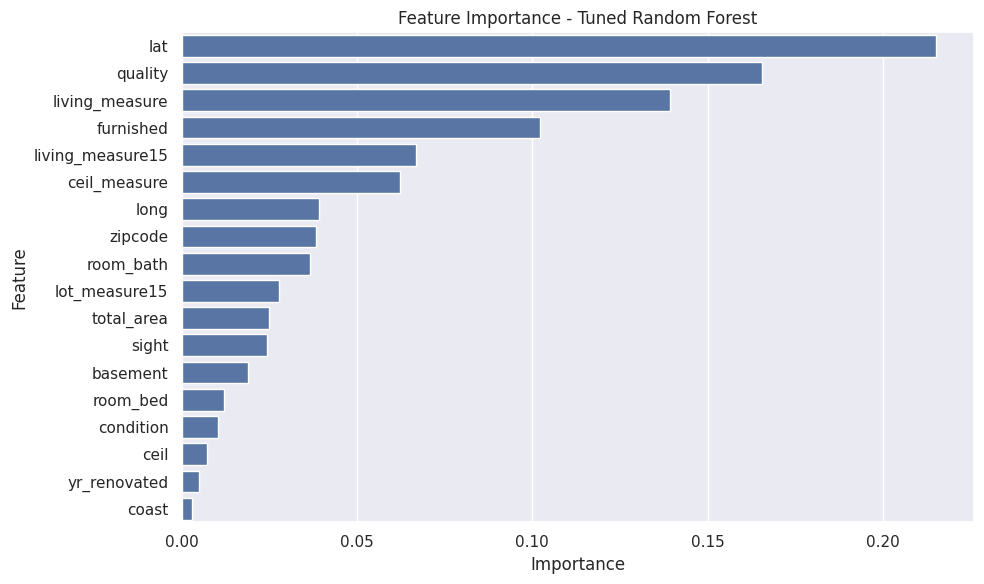

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

features = X.columns
importances = best_rf_model.feature_importances_
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance - Tuned Random Forest')
plt.tight_layout()
plt.show()


Hyperparameter Tuning for Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)

gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

gb_random = RandomizedSearchCV(
    estimator=gb,
    param_distributions=gb_param_grid,
    n_iter=5,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

gb_random.fit(X_train, y_train)
best_gb_model = gb_random.best_estimator_


Fitting 3 folds for each of 5 candidates, totalling 15 fits


Check the best parameters

In [54]:
print("Best Gradient Boosting Parameters:")
print(gb_random.best_params_)

Best Gradient Boosting Parameters:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.1}


Predict and Evaluate the Tuned Model



In [55]:
# Predict on test data
gb_preds = best_gb_model.predict(X_test)

# Reuse the same evaluate_model function you fixed earlier
gb_scores = evaluate_model(y_test, gb_preds)

# Display performance
print("Gradient Boosting Tuned Scores:")
print(f"R² Score : {gb_scores[0]:.4f}")
print(f"MAE      : {gb_scores[1]:.2f}")
print(f"RMSE     : {gb_scores[2]:.2f}")
print(f"MAPE (%) : {gb_scores[3]:.2f}")


Gradient Boosting Tuned Scores:
R² Score : 0.9036
MAE      : 52959.03
RMSE     : 5881597947.59
MAPE (%) : 11.75


Feature Importance Plot

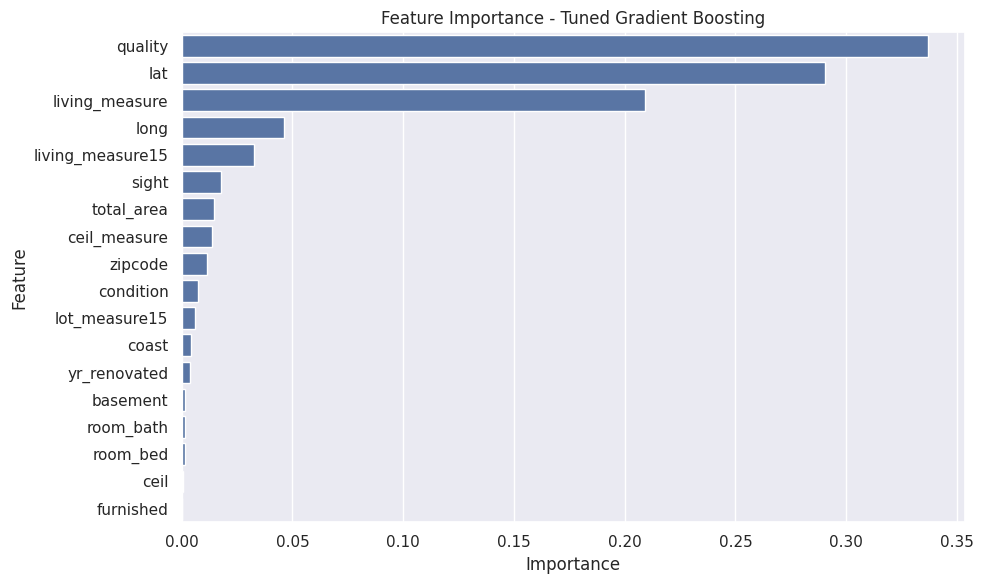

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

features = X.columns
importances = best_gb_model.feature_importances_

feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance - Tuned Gradient Boosting')
plt.tight_layout()
plt.show()


In [60]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Predict
gb_preds = best_gb_model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, gb_preds)
mae = mean_absolute_error(y_test, gb_preds)
rmse = np.sqrt(mean_squared_error(y_test, gb_preds))
mape = (abs((y_test - gb_preds) / y_test).mean()) * 100

print(f"R² Score: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

R² Score: 0.90
MAE: 52959.03
RMSE: 76691.58
MAPE: 11.75%


In [61]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Step 1: Define the model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Step 2: Define parameter grid
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Step 3: Setup RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_grid,
    n_iter=20,  # Try more iterations for better tuning
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42,
    scoring='r2'
)

# Step 4: Fit on training data
xgb_random_search.fit(X_train, y_train)

# Step 5: Best model
best_xgb_model = xgb_random_search.best_estimator_

# Optional: Show best parameters
print("Best Parameters for XGBoost:", xgb_random_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for XGBoost: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.7}


Evaluate Tuned XGBoost

In [62]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict on test set
xgb_preds = best_xgb_model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, xgb_preds)
mae = mean_absolute_error(y_test, xgb_preds)
rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
mape = (abs((y_test - xgb_preds) / y_test).mean()) * 100

print("Tuned XGBoost Performance:")
print(f"R² Score : {r2:.4f}")
print(f"MAE      : {mae:.2f}")
print(f"RMSE     : {rmse:.2f}")
print(f"MAPE (%) : {mape:.2f}")


Tuned XGBoost Performance:
R² Score : 0.9084
MAE      : 51256.91
RMSE     : 74728.14
MAPE (%) : 11.39


Feature Importance Plot for XGBoost


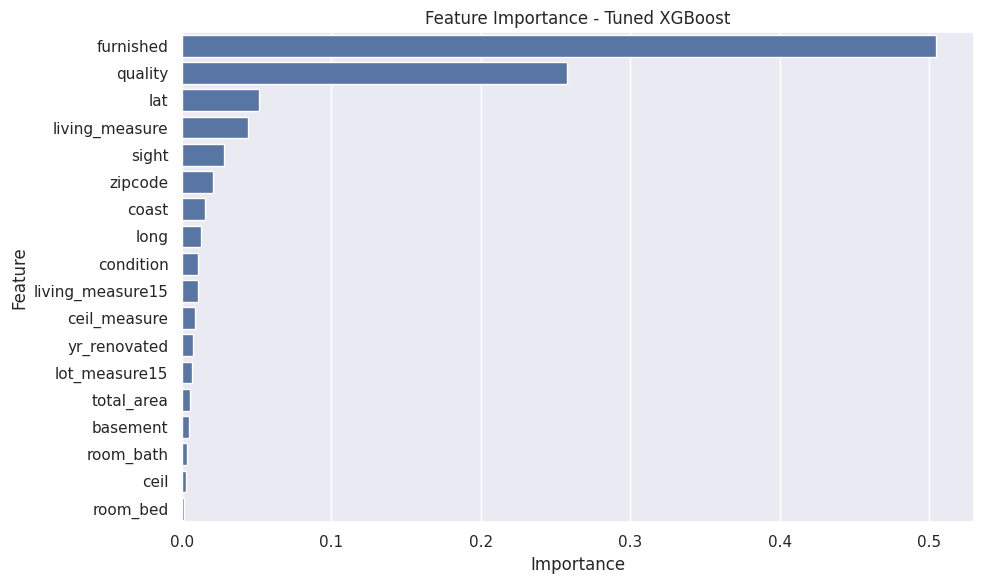

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

features = X.columns
importances = best_xgb_model.feature_importances_

feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance - Tuned XGBoost')
plt.tight_layout()
plt.show()


Hyperparameter Tuning for Decision Tree

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define model
dt = DecisionTreeRegressor(random_state=42)

# Define hyperparameter grid
dt_param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Setup RandomizedSearchCV
dt_random = RandomizedSearchCV(
    estimator=dt,
    param_distributions=dt_param_grid,
    n_iter=10,
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42,
    scoring='r2'
)

# Fit the model
dt_random.fit(X_train, y_train)

# Best model
best_dt_model = dt_random.best_estimator_

# Print best parameters
print("Best Parameters for Decision Tree:")
print(dt_random.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Decision Tree:
{'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10}


Evaluate the Tuned Decision Tree

In [68]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict
dt_preds = best_dt_model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, dt_preds)
mae = mean_absolute_error(y_test, dt_preds)
rmse = np.sqrt(mean_squared_error(y_test, dt_preds))
mape = (abs((y_test - dt_preds) / y_test).mean()) * 100

print("Tuned Decision Tree Performance:")
print(f"R² Score : {r2:.4f}")
print(f"MAE      : {mae:.2f}")
print(f"RMSE     : {rmse:.2f}")
print(f"MAPE (%) : {mape:.2f}")


Tuned Decision Tree Performance:
R² Score : 0.8379
MAE      : 68922.20
RMSE     : 99419.21
MAPE (%) : 15.13


Feature importane plot for Decision Tree

/tmp/ipython-input-69-3936426383.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')


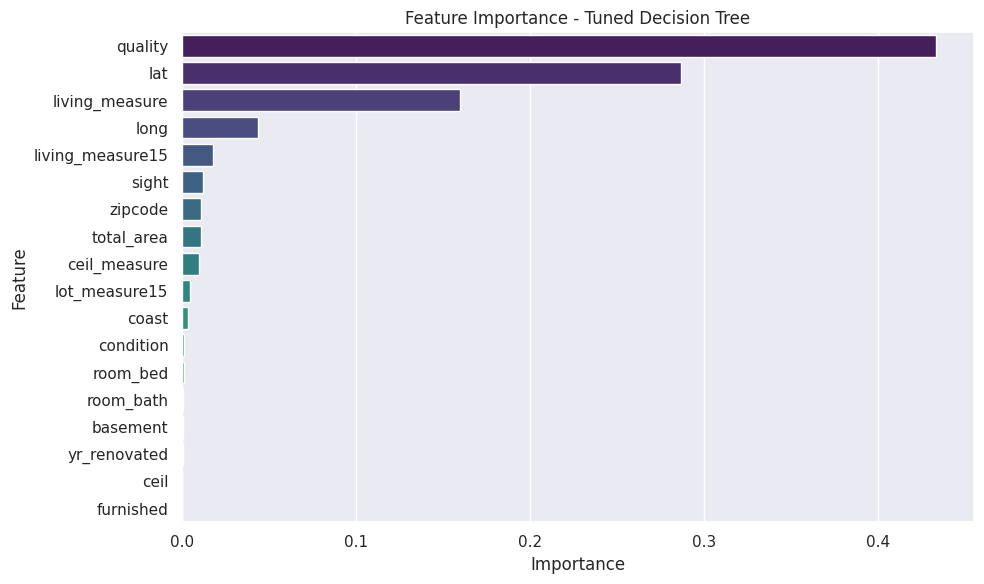

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the model
features = X.columns  # Ensure this matches your original DataFrame
importances = best_dt_model.feature_importances_

# Create a DataFrame for plotting
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Feature Importance - Tuned Decision Tree')
plt.tight_layout()
plt.show()


Linear regression

In [74]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


Plain Linear Regression (No Tuning)

In [75]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

Hyperparameter Tuning: Ridge, Lasso, ElasticNet

In [76]:
# Common alpha values to test
alphas = [0.01, 0.1, 1, 10, 100]

# Ridge Regression
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, {'alpha': alphas}, scoring='r2', cv=3)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
ridge_preds = best_ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, {'alpha': alphas}, scoring='r2', cv=3)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
lasso_preds = best_lasso.predict(X_test)

# ElasticNet
enet = ElasticNet(max_iter=10000)
enet_grid = GridSearchCV(enet, {
    'alpha': alphas,
    'l1_ratio': [0.2, 0.5, 0.8]
}, scoring='r2', cv=3)
enet_grid.fit(X_train, y_train)
best_enet = enet_grid.best_estimator_
enet_preds = best_enet.predict(X_test)


Evaluate All Linear Models

In [77]:
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return r2, mae, rmse, mape

# Evaluate
lr_scores = evaluate_model(y_test, lr_preds)
ridge_scores = evaluate_model(y_test, ridge_preds)
lasso_scores = evaluate_model(y_test, lasso_preds)
enet_scores = evaluate_model(y_test, enet_preds)

# Comparison table
linear_models = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet'],
    'R2 Score': [lr_scores[0], ridge_scores[0], lasso_scores[0], enet_scores[0]],
    'MAE': [lr_scores[1], ridge_scores[1], lasso_scores[1], enet_scores[1]],
    'RMSE': [lr_scores[2], ridge_scores[2], lasso_scores[2], enet_scores[2]],
    'MAPE (%)': [lr_scores[3], ridge_scores[3], lasso_scores[3], enet_scores[3]]
}).round(2).sort_values(by="R2 Score", ascending=False)

print(linear_models)


               Model  R2 Score       MAE       RMSE  MAPE (%)
0  Linear Regression      0.74  95595.60  125194.54     21.26
1   Ridge Regression      0.74  95592.42  125193.59     21.26
2   Lasso Regression      0.74  95584.57  125190.30     21.26
3         ElasticNet      0.74  95585.43  125192.96     21.25


Combine with Other Models

In [79]:
# Create new row as a DataFrame
new_row = pd.DataFrame([{
    'Model': 'Ridge Regression',
    'R2 Score': ridge_scores[0],
    'MAE': ridge_scores[1],
    'RMSE': ridge_scores[2],
    'MAPE (%)': ridge_scores[3]
}])

# Concatenate it with the existing DataFrame
model_comparison = pd.concat([model_comparison, new_row], ignore_index=True)


Compare All Tuned Models

In [84]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Evaluation function
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = (abs((y_true - y_pred) / y_true).mean()) * 100
    return r2, mae, rmse, mape

# Get predictions
rf_preds = best_rf_model.predict(X_test)
gb_preds = best_gb_model.predict(X_test)
xgb_preds = best_xgb_model.predict(X_test)
dt_preds = best_dt_model.predict(X_test)
ridge_preds = best_ridge.predict(X_test)

# Evaluate each model
rf_scores = evaluate_model(y_test, rf_preds)
gb_scores = evaluate_model(y_test, gb_preds)
xgb_scores = evaluate_model(y_test, xgb_preds)
dt_scores = evaluate_model(y_test, dt_preds)
ridge_scores = evaluate_model(y_test, ridge_preds)

# Create comparison DataFrame
model_comparison = pd.DataFrame({
    'Model': ['XGBoost', 'Gradient Boosting', 'Random Forest', 'Decision Tree','Ridge Regression'],
    'R2 Score': [xgb_scores[0], gb_scores[0], rf_scores[0], dt_scores[0],ridge_scores[0]],
    'MAE': [xgb_scores[1], gb_scores[1], rf_scores[1], dt_scores[1],ridge_scores[1]],
    'RMSE': [xgb_scores[2], gb_scores[2], rf_scores[2], dt_scores[2],ridge_scores[2]],
    'MAPE (%)': [xgb_scores[3], gb_scores[3], rf_scores[3], dt_scores[3],ridge_scores[3]]
})

# Format and sort
model_comparison = model_comparison.round(2).sort_values(by='R2 Score', ascending=False)

# Display the table
print(model_comparison)


               Model  R2 Score       MAE       RMSE  MAPE (%)
0            XGBoost      0.91  51256.91   74728.14     11.39
1  Gradient Boosting      0.90  52959.03   76691.58     11.75
2      Random Forest      0.89  56391.01   82175.75     12.47
3      Decision Tree      0.84  68922.20   99419.21     15.13
4   Ridge Regression      0.74  95592.42  125193.59     21.26


Comparison Bar Plot for Report


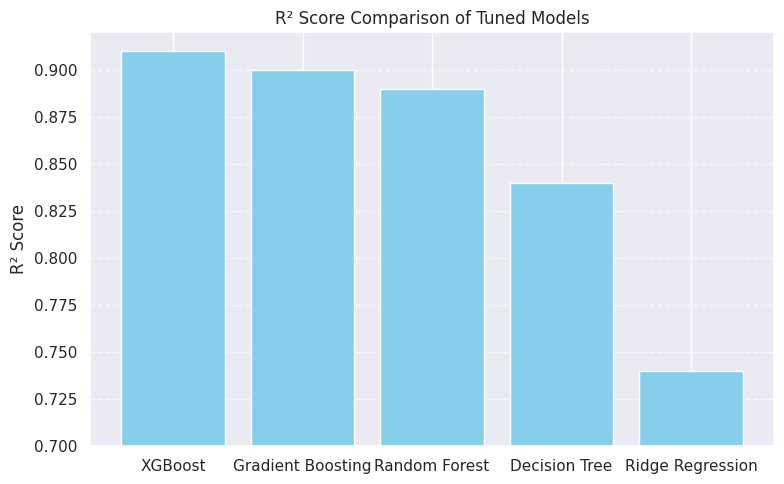

In [85]:
import matplotlib.pyplot as plt

# Plot R2 scores
plt.figure(figsize=(8, 5))
plt.bar(model_comparison['Model'], model_comparison['R2 Score'], color='skyblue')
plt.title('R² Score Comparison of Tuned Models')
plt.ylabel('R² Score')
plt.ylim(0.70, 0.92)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
